
# Hierarchical Clustering
Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. For example, all files and folders on the hard disk are organized in a hierarchy. There are two types of hierarchical clustering, Divisive and Agglomerative.

## Divisive method

In this method we assign all of the observations to a single cluster and then partition the cluster to two least similar clusters. Finally, we proceed recursively on each cluster until there is one cluster for each observation.

## Agglomerative method

In this method we assign each observation to its own cluster. Then, compute the similarity (e.g., distance) between each of the clusters and join the two most similar clusters. Finally, repeat steps 2 and 3 until there is only a single cluster left.

In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
data = pd.read_csv(r"https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


(array([24., 22., 28., 38., 30., 36.,  8.,  6.,  4.,  4.]),
 array([ 15. ,  27.2,  39.4,  51.6,  63.8,  76. ,  88.2, 100.4, 112.6,
        124.8, 137. ]),
 <a list of 10 Patch objects>)

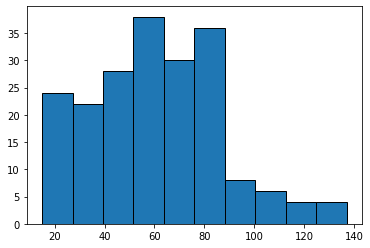

In [12]:
plt.hist(data['Annual Income (k$)'],edgecolor='k')

(array([16., 20., 10., 17., 35., 37., 11., 24., 14., 16.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <a list of 10 Patch objects>)

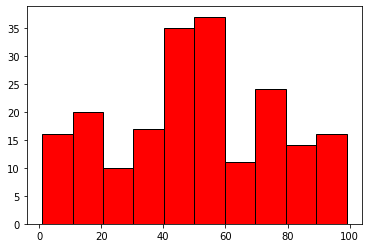

In [15]:
plt.hist(data["Spending Score (1-100)"],color = "r",edgecolor='k')

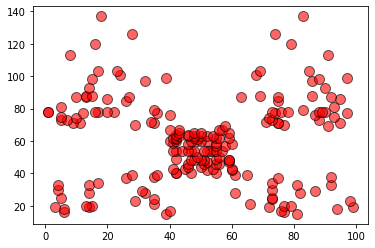

In [18]:
plt.scatter(data["Spending Score (1-100)"],data['Annual Income (k$)'],color='red',edgecolor='k',alpha=0.6, s=100)

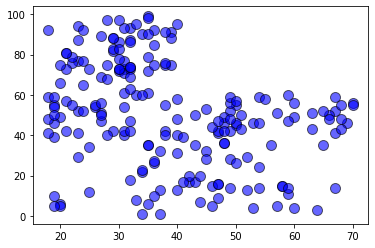

In [21]:
plt.scatter(data['Age'],data['Spending Score (1-100)'],color='blue',edgecolor='k',alpha=0.6, s=100)

In [27]:
X = data.iloc[:,[3,4]]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


### making of an dendograph for k  

In [30]:
import scipy.cluster.hierarchy as sch

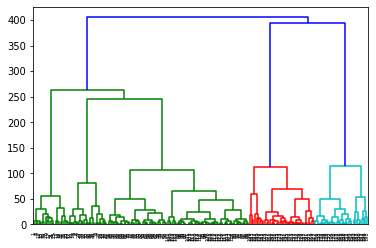

In [41]:
sch.dendrogram(sch.linkage(X,method="ward"))
plt.show()

In [42]:
#so we can see thre 

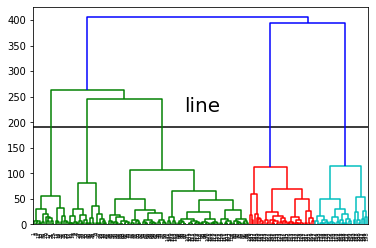

In [47]:
plt.hlines(y=190,xmin=0,xmax=2000)
plt.text(x=900,y=220,s="line",fontsize=20)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()

In [49]:
from sklearn.cluster import AgglomerativeClustering

In [50]:
hc =  AgglomerativeClustering( n_clusters=5,affinity='euclidean',linkage='ward')

In [51]:
hc

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5)

In [60]:
 hc.fit_predict(X)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [61]:
X

,Annual Income (k$),Spending Score (1-100),clust
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,2
196,126,28,0
197,126,74,2
198,137,18,0


In [67]:
df0 = X[X["clust"]==0]
df1 = X[X["clust"]==1]
df2 = X[X["clust"]==2]
df3 = X[X["clust"]==3]
df4 = X[X["clust"]==4]

df1

,Annual Income (k$),Spending Score (1-100),clust
43,39,61,1
45,39,65,1
46,40,55,1
47,40,47,1
48,40,42,1
...,...,...,...
126,71,35,1
132,72,34,1
142,76,40,1
146,77,36,1


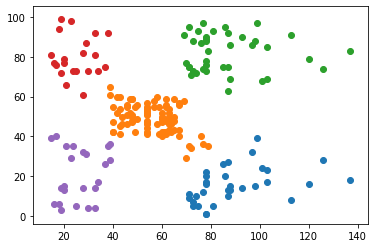

In [70]:
plt.scatter(df0["Annual Income (k$)"],df0["Spending Score (1-100)"])
plt.scatter(df1["Annual Income (k$)"],df1["Spending Score (1-100)"])
plt.scatter(df2["Annual Income (k$)"],df2["Spending Score (1-100)"])
plt.scatter(df3["Annual Income (k$)"],df3["Spending Score (1-100)"])
plt.scatter(df4["Annual Income (k$)"],df4["Spending Score (1-100)"])

In [71]:
#lets verefy by using k means

In [78]:
from sklearn.cluster import KMeans

In [81]:
ssc = []
for i in range(1,10):
    km = KMeans(n_clusters = i,init='k-means++')
    km.fit(X)
    ssc.append(km.inertia_)
    

In [95]:
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [85]:
ssc

[270273.66000000003,
 181588.2505050505,
 106544.25496198282,
 73751.2016710673,
 44455.01648689475,
 37240.37554967105,
 30281.2865679623,
 25021.707767559892,
 21878.27996315279]

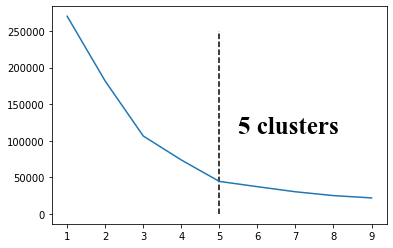

In [97]:
plt.plot(range(1, 10), ssc)
plt.vlines(x=5,ymin=0,ymax=250000,linestyles='--')
plt.text(x=5.5,y=110000,s='5 clusters',fontsize=25,fontdict={'family':'Times New Roman'})
plt.show()